## Beer Data Science Project

In [103]:
#Importing requires Modules

import pandas as pd
import seaborn as sns

In [104]:
#Loading Given Data

df = pd.read_csv(r"C:\Users\USER\Downloads\BeerDataScienceProject\BeerDataScienceProject.csv",encoding='latin-1')

In [105]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [106]:
#calculating year from review_time feature
df['review_year'] = pd.DatetimeIndex(pd.to_datetime(df['review_time'], unit='s')).year
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010


* Beer_ABV: Alcohol By Value


In [111]:
print("Total Number of records are {} and features are {}".format(df.shape[0],df.shape[1]))

Total Number of records are 528870 and features are 14


In [112]:
print("Maximum rating based on appearance of beer is {} and Minimum is {}".format(df['review_appearance'].max(),df['review_appearance'].min()))
print("Maximum rating based on palette of beer is {} and Minimum is {}".format(df['review_palette'].max(),df['review_palette'].min()))
print("Maximum rating based on taste of beer is {} and Minimum is {}".format(df['review_taste'].max(),df['review_taste'].min()))
print("Maximum rating based on aroma of beer is {} and Minimum is {}".format(df['review_aroma'].max(),df['review_aroma'].min()))
print("Maximum overall rating of beer is {} and Minimum is {}".format(df['review_overall'].max(),df['review_overall'].min()))

Maximum rating based on appearance of beer is 5.0 and Minimum is 0.0
Maximum rating based on palette of beer is 5.0 and Minimum is 1.0
Maximum rating based on taste of beer is 5.0 and Minimum is 1.0
Maximum rating based on aroma of beer is 5.0 and Minimum is 1.0
Maximum overall rating of beer is 5.0 and Minimum is 0.0


In [113]:
#Dropping duplicates
df=df.drop_duplicates()

In [114]:
#Clearly tells No duplicates present in data
df.shape

(528870, 14)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528870 entries, 0 to 528869
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
 13  review_year         528870 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 60.5+ MB


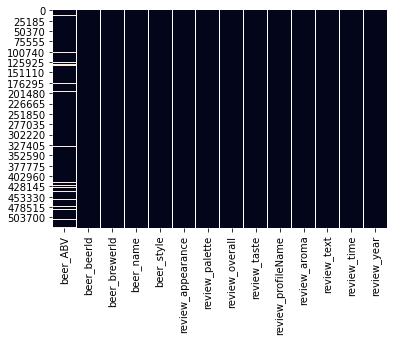

In [116]:
#I dentifying Missing Values 
sns.heatmap(df.isnull(),cbar = False)

In [118]:
#filling NaN by 0
df['beer_ABV'] = df['beer_ABV'].fillna(0)

In [126]:
print(round(((df['beer_ABV'] == 0).sum()/df.shape[0])*100,2),"% has Nan values from total data")

3.83 % has Nan values from total data


In [127]:
df = df.drop(df[df['beer_ABV'] == 0].index)

In [128]:
df.shape

(508590, 14)

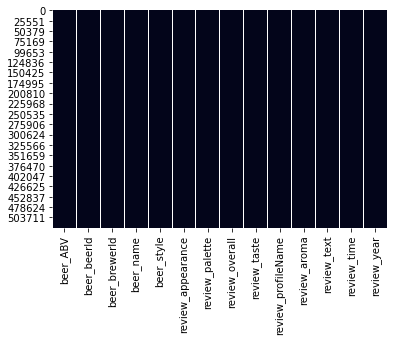

In [129]:
sns.heatmap(df.isnull(),cbar = False)

In [130]:
#Correlation matrix helps in finding relations among features
df.corr()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,review_year
beer_ABV,1.000000,0.218097,0.078540,0.252577,0.319468,0.119603,0.269182,0.271716,0.143451,0.145108
beer_beerId,0.218097,1.000000,0.460915,0.051206,0.061340,-0.011667,0.036269,0.015111,0.460043,0.456597
beer_brewerId,0.078540,0.460915,1.000000,-0.004622,0.017370,-0.014277,-0.002709,-0.009601,0.245941,0.242359
review_appearance,0.252577,0.051206,-0.004622,1.000000,0.544775,0.483098,0.551950,0.531193,0.046527,0.047653
review_palette,0.319468,0.061340,0.017370,0.544775,1.000000,0.598074,0.600866,0.703454,0.050561,0.050913
review_overall,0.119603,-0.011667,-0.014277,0.483098,0.598074,1.000000,0.689299,0.780320,0.018770,0.020072
review_taste,0.269182,0.036269,-0.002709,0.551950,0.600866,0.689299,1.000000,0.722763,0.044219,0.045474
review_aroma,0.271716,0.015111,-0.009601,0.531193,0.703454,0.780320,0.722763,1.000000,0.029388,0.030460
review_time,0.143451,0.460043,0.245941,0.046527,0.050561,0.018770,0.044219,0.029388,1.000000,0.992334
review_year,0.145108,0.456597,0.242359,0.047653,0.050913,0.020072,0.045474,0.030460,0.992334,1.000000


## Rank top 3 Breweries which produce the strongest beers

In [139]:
df8 = df.groupby(['beer_name','beer_brewerId'], as_index=False)['beer_ABV'].mean().sort_values(by=['beer_ABV'],ascending=False)

In [145]:
df8.head(3)

,beer_name,beer_brewerId,beer_ABV
11764,Schorschbräu Schorschbock 57%,6513,57.70
11763,Schorschbräu Schorschbock 43%,6513,43.00
11762,Schorschbräu Schorschbock 40%,6513,39.44


In [141]:
df9 = df.groupby(['beer_brewerId'], as_index=False)['beer_ABV'].mean().sort_values(by=['beer_ABV'],ascending=False)

In [142]:
df9.head(3)

,beer_brewerId,beer_ABV
699,6513,19.228824
165,736,13.750000
1466,24215,12.466667


## Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [148]:
feature = df[['review_overall','review_aroma','review_taste','review_appearance','review_palette']]
feature.head()

,review_overall,review_aroma,review_taste,review_appearance,review_palette
0,1.5,1.5,1.5,2.5,2.0
1,3.0,3.0,3.0,3.0,2.5
2,3.0,3.0,3.0,3.0,2.5
3,3.0,3.0,2.5,3.5,3.0
4,4.0,4.5,4.0,4.0,4.5


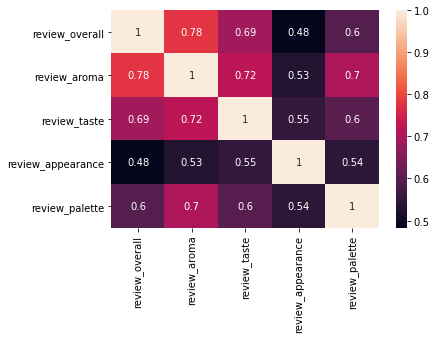

In [150]:
sns.heatmap(feature.corr(), annot=True)
plt.show()

In [160]:
label = feature.drop(["review_overall"], axis=1).columns
label

Index(['review_aroma', 'review_taste', 'review_appearance', 'review_palette'], dtype='object')

In [163]:
from sklearn.ensemble import RandomForestRegressor
rnd_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(feature[label].values, feature["review_overall"].values)
feature_importance = rnd_clf.feature_importances_

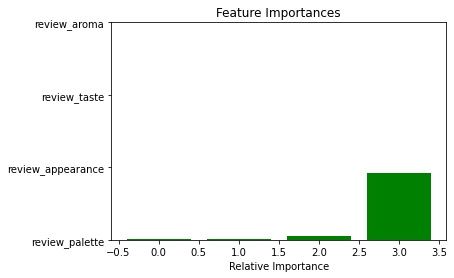

In [190]:
indices = np.argsort(feature_importance)
plt.title('Feature Importances')
plt.bar(range(len(indices)), feature_importance[indices], color='g')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

## If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [165]:
df.head(5)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010


In [176]:
df9 = df.groupby(['beer_name'], as_index=False)['review_overall'].mean()
df9.sort_values(by=['review_overall'], ascending=False).head(3)

,beer_name,review_overall
7419,Leichtbier,5.0
10628,S&#333;jun Weizen Classic Ale (Cedar Aged) Bre...,5.0
5026,Gleumes Hell,5.0


## Which Beer style seems to be the favorite based on reviews written by users?

In [75]:
!pip install -U spacy

Requirement already up-to-date: spacy in d:\anaconda\lib\site-packages (3.1.2)


In [76]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-09-07 19:36:08.878472: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-09-07 19:36:08.888644: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508590 entries, 0 to 528796
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         508590 non-null  int64  
 2   beer_brewerId       508590 non-null  int64  
 3   beer_name           508590 non-null  object 
 4   beer_style          508590 non-null  object 
 5   review_appearance   508590 non-null  float64
 6   review_palette      508590 non-null  float64
 7   review_overall      508590 non-null  float64
 8   review_taste        508590 non-null  float64
 9   review_profileName  508475 non-null  object 
 10  review_aroma        508590 non-null  float64
 11  review_text         508473 non-null  object 
 12  review_time         508590 non-null  int64  
 13  review_year         508590 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 58.2+ MB


In [184]:
#Cleaning of text Column
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()
import re

 

# Contraction to Expansion
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    
 
df['review_text'] = df['review_text'].apply(lambda x: cont_to_exp(x))
df['review_text'] = df['review_text'].apply(lambda x: str(x).lower())
df['review_text'] = df['review_text'].apply(lambda x: re.sub('[^a-z ]+', '', x))
df['review_text'] = df['review_text'].apply(lambda x: " ".join([t for t in str(x).split() if t not in STOP_WORDS]))
   

In [85]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


In [185]:
df['polarity_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [186]:
# Group by 'beer_style' and calculate mean of polarity score
df.groupby('beer_style')['polarity_score'].mean().sort_values(ascending=False)[0:10]

beer_style
Braggot                             0.887807
Eisbock                             0.887626
Quadrupel (Quad)                    0.883739
Flanders Red Ale                    0.881048
Wheatwine                           0.875415
Dortmunder / Export Lager           0.873097
Roggenbier                          0.872706
American Double / Imperial Stout    0.870670
American Wild Ale                   0.865713
Kvass                               0.862246
Name: polarity_score, dtype: float64

**From above we can see most fav beer style is  Braggot**

## 6. How does written review compare to overall review score for the beer styles?

In [88]:
reviews_all = df_final.groupby('beer_style').agg({
                                            'polarity_score': np.mean,
                                            'review_overall': np.mean
                                        })
review_score_beerstyle = pd.DataFrame(reviews_all.reset_index()).sort_values(['polarity_score','review_overall'], ascending=[False,False])
review_score_beerstyle.head()

,beer_style,polarity_score,review_overall
86,Quadrupel (Quad),0.874815,4.049250
32,Braggot,0.873152,3.645729
41,Eisbock,0.871286,4.079487
58,Flanders Red Ale,0.869993,3.962561
38,Dortmunder / Export Lager,0.864690,4.051962


**From above we can see that intension of review is directly propotional to overall rating**

## 7.How do find similar beer drinkers by using written reviews only

In [89]:
!pip install gensim

In [90]:
corpus = []
for words in df['review_text']:
    corpus.append(words.split())

In [91]:
# training word2vec model
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
mymodel_cbow = Word2Vec(corpus, min_count=1, size = 300)

In [92]:
# summarize vocabulary
words = list(mymodel_cbow.wv.vocab)

In [93]:

mymodel_cbow.most_similar("prosper")

[('couckelrschen', 0.7950553894042969),
 ('pesci', 0.7901233434677124),
 ('malthigh', 0.7888407707214355),
 ('firery', 0.7817192673683167),
 ('hellweltenburger', 0.7816909551620483),
 ('worldi', 0.7810505032539368),
 ('aragornunplugged', 0.7805875539779663),
 ('thoughtreminds', 0.7803360819816589),
 ('statically', 0.7798987627029419),
 ('urquellbranded', 0.7797725200653076)]

In [94]:
def vectors(x):
    
    # Creating a list for storing the vectors (description into vectors)
    global word_embeddings
    word_embeddings = []

    # Reading the each review_texts
    for line in df_final['review_text']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in mymodel_cbow.wv.vocab:
                count += 1
                if avgword2vec is None:
                    avgword2vec = mymodel_cbow[word]
                else:
                    avgword2vec = avgword2vec + mymodel_cbow[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
            word_embeddings.append(avgword2vec)

In [95]:
# Recommending the Top 5 similar drinkers

def recommendations(title):
    
    # Calling the function vectors

    vectors(df)
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(word_embeddings, word_embeddings)

    drinker = df[['review_profileName']]
    #Reverse mapping of the index
    indices = pd.Series(df_final.index, index = df['review_profileName']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    drinker_indices = [i[0] for i in sim_scores]
    recommend = drinker.iloc[drinker_indices]
    for index, row in recommend.iterrows():
        print(row['review_profileName'])

In [188]:
recommendations("Red Moon") #this will print similar drinkers based on similarity score

KeyboardInterrupt: 